<a href="https://colab.research.google.com/github/Vayansh/Yolo_training/blob/master/Project-4_Poker_hand_Detection/Playing_card_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
from google.colab import files

files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d andy8744/playing-cards-object-detection-dataset

Saving kaggle.json to kaggle.json
 97% 650M/674M [00:05<00:00, 125MB/s]
100% 674M/674M [00:06<00:00, 117MB/s]


In [ ]:
!unzip /content/playing-cards-object-detection-dataset.zip

In [ ]:
!pip install ultralytics==8.0.26


In [ ]:
!yolo task=detect mode=predict model=yolov8m.pt conf=0.25 source='https://ultralytics.com/images/bus.jpg'

100% 49.7M/49.7M [00:00<00:00, 189MB/s]
2023-08-15 07:13:37.854551: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-15 07:13:38.857860: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.26 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m summary (fused): 218 layers, 25886080 parameters, 0 gradients, 78.9 GFLOPs

100% 476k/476k [00:00<00:00, 12.4MB/s]
image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 76.2ms
Speed: 0.8ms pre-process, 76.2ms inference, 49.3ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


# Custom Training

In [ ]:
import cv2 as cv

In [ ]:
img = cv.imread('/content/train/images/000090528_jpg.rf.d50e89610e5c97c61632c290692f3e75.jpg')

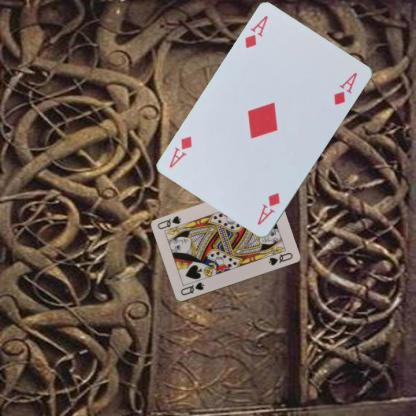

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/data.yaml epochs=50 imgsz=640

100% 49.7M/49.7M [00:00<00:00, 219MB/s]
Ultralytics YOLOv8.0.26 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, si